Imported Some Important Required Libraries

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sklearn
%matplotlib inline

from patsy import dmatrices

To Read The data from Csv File Stored in the desktop

In [71]:
df=pd.read_csv("E:\\Data Scientist\\Projects\\1576148666_ibmattritiondata\\IBM Attrition Data.csv")
# print(df.head())
df2=df #Copied the original Dataset to other variable
# print(data.head())
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


Checking Shape and size of DataSet along with null Values

In [72]:
df.shape

(1470, 13)

In [73]:
df.isnull().sum() #Checking for Null Values

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

Defining function variable to convert numeric data in Education coloumn to its original specified value

In [74]:
def Education(x):
    if x==1:
        return "Below College"
    elif x==2:
        return "College"
    elif x==3:
        return "Bachelor"
    elif x==4:
        return "Master"
    elif x==5:
        return "Doctor"

In [75]:
df["Education"]=df['Education'].apply(lambda x:Education(x))
df.head(1)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,College,Life Sciences,2,4,Single,5993,8,1,6


Function to assign original values to the columns on basis of numerical data

In [76]:
def EnvironmentSatisfaction(x):
    if x==1:
        return "Low"
    elif x==2:
        return "Medium"
    elif x==3:
        return "High"
    elif x==4:
        return "Very High"
def  Jobsatisfaction(x):
    if x==1:
        return "Low"
    elif x==2:
        return "Medium"
    elif x==3:
        return "High"
    elif x==4:
        return "Very High"
def Worklifebalance(x):
    if x==1:
        return "Bad"
    elif x==2:
        return "Good"
    elif x==3:
        return "Better"
    elif x==4:
        return "Best"

In [77]:
df["EnvironmentSatisfaction"]=df["EnvironmentSatisfaction"].apply(lambda x:EnvironmentSatisfaction(x))
df["JobSatisfaction"]=df["JobSatisfaction"].apply(lambda x:Jobsatisfaction(x))
df["WorkLifeBalance"]=df["WorkLifeBalance"].apply(lambda x:Worklifebalance(x))
df.head(4)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,College,Life Sciences,Medium,Very High,Single,5993,8,Bad,6
1,49,No,Research & Development,8,Below College,Life Sciences,High,Medium,Married,5130,1,Better,10
2,37,Yes,Research & Development,2,College,Other,Very High,High,Single,2090,6,Better,0
3,33,No,Research & Development,3,Master,Life Sciences,Very High,High,Married,2909,1,Better,8


<AxesSubplot:title={'center':'Age distribution of Employees'}, xlabel='Age of Employees', ylabel='Number of Employees'>

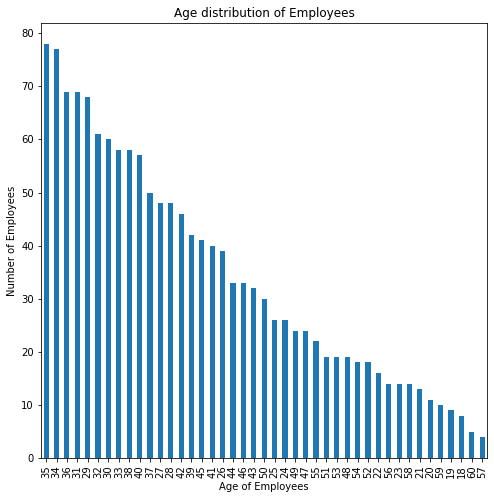

In [78]:
# Bar Chart for Ages
plt.title("Age distribution of Employees")
plt.xlabel("Age of Employees")
plt.ylabel("Number of Employees")
df['Age'].value_counts().plot(kind='bar',figsize=(8,8))


In [79]:
df['Age'].value_counts().head(3)


35    78
34    77
36    69
Name: Age, dtype: int64

In [80]:
df[['Age','Attrition']].head(5)

,Age,Attrition
0,41,Yes
1,49,No
2,37,Yes
3,33,No
4,27,No


Exploring Data For Attirition By Age

No     1233
Yes     237
Name: Attrition, dtype: int64


<AxesSubplot:>

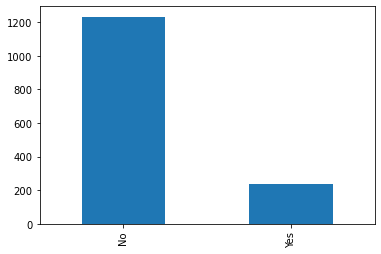

In [81]:
print(df['Attrition'].value_counts())
df['Attrition'].value_counts().plot(kind='bar')


In [82]:
print(df[['Age',"Attrition"]][df['Attrition']=='Yes'].count())
df[['Age','Attrition']][df['Attrition']=="No"].count() 
#just Seprating Yes Attiration And No Attirition Data by Exact Counts

Age          237
Attrition    237
dtype: int64


Age          1233
Attrition    1233
dtype: int64

In [83]:
print(df[df['Attrition']=='Yes']) 

      Age Attrition              Department  DistanceFromHome      Education  \
0      41       Yes                   Sales                 1        College   
2      37       Yes  Research & Development                 2        College   
14     28       Yes  Research & Development                24       Bachelor   
21     36       Yes                   Sales                 9         Master   
24     34       Yes  Research & Development                 6  Below College   
...   ...       ...                     ...               ...            ...   
1438   23       Yes                   Sales                 9       Bachelor   
1442   29       Yes  Research & Development                 1         Master   
1444   56       Yes  Research & Development                 7        College   
1452   50       Yes                   Sales                 1         Master   
1461   50       Yes                   Sales                28       Bachelor   

        EducationField EnvironmentSatis

To Explore the Distribution of data on the basis of Education Field

To find out Distribution of Employees By Education Field

In [84]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

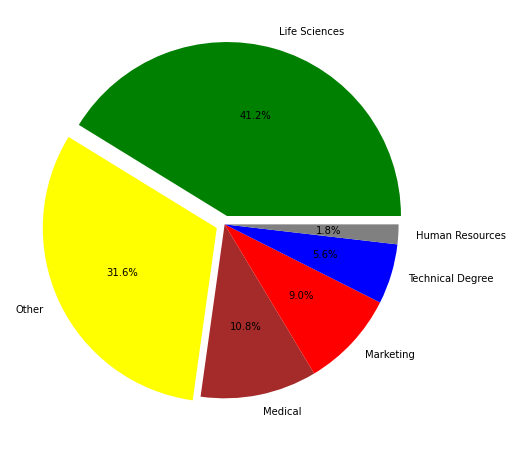

In [85]:
explode=(0.05,0.05,0,0,0,0)
plt.figure(figsize=(8,8))
plt.pie(df['EducationField'].value_counts(),autopct='%1.1f%%',labels=df['EducationField'].unique() ,explode=explode,colors=['green','yellow','brown','red','blue','Grey'])
plt.show()

Bar Chart For Number Of Married And Unmarried Employees

<AxesSubplot:>

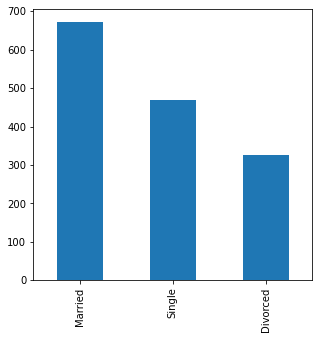

In [86]:
df['MaritalStatus'].value_counts()
plt.figure(figsize=(5,5)   )
df['MaritalStatus'].value_counts().plot(kind='bar')
# for i in df['MaritalStatus'].value_counts():
#     plt.text(i,i,str(i))
# plt.xlabel('col')
# plt.ylabel('Count')


Now task is to build a Model To Predict Which Employee is likely to Attire

In [87]:
df.describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,6502.931293,2.693197,7.008163
std,9.135373,8.106864,4707.956783,2.498009,6.126525
min,18.000000,1.000000,1009.000000,0.000000,0.000000
25%,30.000000,2.000000,2911.000000,1.000000,3.000000
50%,36.000000,7.000000,4919.000000,2.000000,5.000000
75%,43.000000,14.000000,8379.000000,4.000000,9.000000
max,60.000000,29.000000,19999.000000,9.000000,40.000000


In [88]:
x=df.drop(['Attrition'],axis=1)
x.head(3)

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Sales,1,College,Life Sciences,Medium,Very High,Single,5993,8,Bad,6
1,49,Research & Development,8,Below College,Life Sciences,High,Medium,Married,5130,1,Better,10
2,37,Research & Development,2,College,Other,Very High,High,Single,2090,6,Better,0


In [89]:
y=df['Attrition']
y.head(3)

0    Yes
1     No
2    Yes
Name: Attrition, dtype: object

To COnvert Textual Data To Numerical Info for Logistic REgression to work upon

In [90]:
def EducationRev(x):
    if x=="Below College":
        return 1 
    elif x=="College":
        return 2
    elif x=="Bachelor":
        return 3
    elif x=="Master":
        return 4
    elif x=="Doctor":
        return 5
    
def EnvironmentSatisfactionRev(x):
    if x=="Low":
        return 1
    elif x=="Medium":
        return 2
    elif x=="High":
        return 3
    elif x=="Very High":
        return 4
def  JobsatisfactionRev(x):
    if x=="Low":
        return 1
    elif x=="Medium":
        return 2
    elif x=="High":
        return 3
    elif x=="Very High":
        return 4
def WorklifebalanceRev(x):
    if x=="Bad":
        return 1
    elif x=="Good":
        return 2
    elif x=="Better":
        return 3
    elif x=="Best":
        return 4    
df['Attrition'].replace('Yes',1, inplace=True)
df['Attrition'].replace('No',0, inplace=True)

def EF(x):
    if x=='Life Sciences':
        return 1
    elif x=='Medical':
        return 2
    elif x=='Marketing':
        return 3
    elif x=='Other':
        return 4
    elif x=='Technical Degree':
        return 5
    elif x=='Human Resources':
        return 6
def mary(x):
    if x == "Married":
        return 1
    elif x=='Single':
        return 2
    elif x=='Divorced':
        return 3
df['Department'].replace('Research & Development',1, inplace=True)
df['Department'].replace('Sales',2, inplace=True)
df['Department'].replace('Human Resources', 3, inplace=True)


In [91]:
df['Education']=df['Education'].apply(lambda x:EducationRev(x))
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].apply(lambda x:EnvironmentSatisfactionRev(x))
df['JobSatisfaction']=df['JobSatisfaction'].apply(lambda x:JobsatisfactionRev(x))
df['WorkLifeBalance']=df['WorkLifeBalance'].apply(lambda x:WorklifebalanceRev(x))
df['EducationField']=df['EducationField'].apply(lambda x : EF(x))
df['MaritalStatus']=df['MaritalStatus'].apply(lambda x:mary(x))
df.head(9)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,4,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,2,1,2,1,3468,9,3,2
5,32,0,1,2,2,1,4,4,2,3068,0,2,7
6,59,0,1,3,3,2,3,1,1,2670,4,2,1
7,30,0,1,24,1,1,4,3,3,2693,1,3,1
8,38,0,1,23,3,1,4,3,2,9526,0,3,9


In [92]:
y,x=dmatrices('Attrition ~ Age+Department+DistanceFromHome+Education+EducationField+EnvironmentSatisfaction+JobSatisfaction+MaritalStatus+MonthlyIncome+NumCompaniesWorked+WorkLifeBalance+YearsAtCompany',df,return_type='dataframe')
# y,x=dmatrices('Attrition~EnvironmentSatisfaction+JobSatisfaction+MonthlyIncome',df,return_type='dataframe')
print(x.columns)
print(y.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')
Index(['Attrition'], dtype='object')


In [93]:
y=np.ravel(y)
print(y)

[1. 0. 1. ... 0. 0. 0.]


In [94]:
from sklearn.linear_model import LinearRegression
model=LogisticRegression()
model=model.fit(x,y)
model.score(x,y)

c:\Users\abhit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8435374149659864

In [95]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.3,random_state=0)
model2 =LogisticRegression()
model2.fit(X_train,y_train)

c:\Users\abhit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
predicted=model2.predict(X_test)
print(predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [97]:
probability=model2.predict_proba(X_test)
print(probability)

[[0.91451564 0.08548436]
 [0.85287358 0.14712642]
 [0.83337247 0.16662753]
 [0.7855058  0.2144942 ]
 [0.83829022 0.16170978]
 [0.83924033 0.16075967]
 [0.77173609 0.22826391]
 [0.75773224 0.24226776]
 [0.9756046  0.0243954 ]
 [0.82674201 0.17325799]
 [0.97447382 0.02552618]
 [0.80576482 0.19423518]
 [0.93235584 0.06764416]
 [0.69698659 0.30301341]
 [0.87707619 0.12292381]
 [0.90202237 0.09797763]
 [0.92734239 0.07265761]
 [0.8901063  0.1098937 ]
 [0.83868976 0.16131024]
 [0.59443975 0.40556025]
 [0.75990697 0.24009303]
 [0.95689457 0.04310543]
 [0.89998663 0.10001337]
 [0.93227109 0.06772891]
 [0.57799809 0.42200191]
 [0.77852359 0.22147641]
 [0.84765461 0.15234539]
 [0.95543304 0.04456696]
 [0.72931249 0.27068751]
 [0.88765689 0.11234311]
 [0.8977327  0.1022673 ]
 [0.72368026 0.27631974]
 [0.85445049 0.14554951]
 [0.91360485 0.08639515]
 [0.91862493 0.08137507]
 [0.93704146 0.06295854]
 [0.92353392 0.07646608]
 [0.81009455 0.18990545]
 [0.95523902 0.04476098]
 [0.85071853 0.14928147]


In [98]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test,probability[:,1]))

0.8458049886621315
0.6948402002310359


In [99]:
print(metrics.confusion_matrix(y_test,predicted))
print(metrics.classification_report(y_test,predicted))


[[369   2]
 [ 66   4]]
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       371
         1.0       0.67      0.06      0.11        70

    accuracy                           0.85       441
   macro avg       0.76      0.53      0.51       441
weighted avg       0.82      0.85      0.79       441



In [100]:
X_train

,Intercept,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
338,1.0,30.0,2.0,5.0,3.0,3.0,4.0,3.0,3.0,6118.0,1.0,3.0,10.0
363,1.0,33.0,2.0,5.0,3.0,3.0,4.0,3.0,2.0,2851.0,1.0,3.0,1.0
759,1.0,45.0,3.0,24.0,4.0,2.0,2.0,2.0,2.0,2177.0,1.0,3.0,6.0
793,1.0,28.0,1.0,15.0,2.0,1.0,1.0,3.0,3.0,2207.0,1.0,2.0,4.0
581,1.0,30.0,1.0,1.0,3.0,1.0,4.0,3.0,1.0,3833.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.0,34.0,2.0,10.0,4.0,1.0,3.0,3.0,1.0,2220.0,1.0,3.0,1.0
835,1.0,35.0,3.0,8.0,4.0,5.0,3.0,3.0,2.0,4323.0,1.0,1.0,5.0
1216,1.0,43.0,2.0,2.0,3.0,2.0,4.0,4.0,1.0,7847.0,1.0,3.0,10.0
559,1.0,38.0,1.0,2.0,5.0,2.0,4.0,3.0,1.0,3057.0,6.0,1.0,1.0


In [101]:
check=[[1,23,2,3,2,1.3,1.3,1.4,1.6,2323,1,3,10]]
print(model.predict_proba(check))

[[0.7502101 0.2497899]]
